### Instructor Demo: Returns

This program reads daily stock data from a CSV, trims extraneous columns, converts date strings to datetime objects, sets the datetimes as the index, and calculates and plots returns for a specified date range.

Equation: $r=\frac{{p_{t}} - {p_{0}}}{p_{0}}$

Where $r$ is return on investment, ${p_{t}}$ is the price at time $t$, and ${p_{0}}$ is the initial price

In [1]:
import pandas as pd
%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Read in the CSV as a DataFrame
df = pd.read_csv('../Resources/sp500_stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-02,1885.300049,1891.329956,1878.500000,1881.140015,1881.140015,3159560000
1,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
2,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
3,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
4,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000


In [3]:
# Use the 'describe()' function
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2316.801637,2326.829332,2305.725223,2317.082948,2317.082948,3.596083e+09
std,317.895587,318.579627,317.124199,317.705702,317.705702,6.939543e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.349780e+09
25%,2057.875000,2067.634888,2044.870025,2058.322449,2058.322449,3.188478e+09
50%,2179.030029,2184.969971,2172.895019,2180.639893,2180.639893,3.504925e+09
75%,2636.292481,2652.804931,2612.815063,2636.575012,2636.575012,3.893518e+09
max,2952.330078,2954.129883,2939.350098,2945.830078,2945.830078,7.609010e+09


In [4]:
# Drop unnecessary columns
df.drop(columns= ['Open','High','Low','Close','Volume'], inplace= True)
df

,Date,Adj Close
0,2014-05-02,1881.140015
1,2014-05-05,1884.660034
2,2014-05-06,1867.719971
3,2014-05-07,1878.209961
4,2014-05-08,1875.630005
...,...,...
1253,2019-04-25,2926.169922
1254,2019-04-26,2939.879883
1255,2019-04-29,2943.030029
1256,2019-04-30,2945.830078


In [5]:
# Set the date as the index to the DataFrame
df.set_index(pd.to_datetime(df['Date'],infer_datetime_format= True), inplace= True)
df.head()

,Date,Adj Close
Date,,
2014-05-02,2014-05-02,1881.140015
2014-05-05,2014-05-05,1884.660034
2014-05-06,2014-05-06,1867.719971
2014-05-07,2014-05-07,1878.209961
2014-05-08,2014-05-08,1875.630005


In [6]:
# Drop the extra date column
df.drop(columns= ['Date'], inplace= True)
df.head()

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


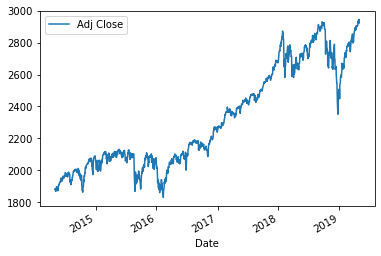

In [7]:
df.plot()

In [8]:
# Calculate the daily return using the 'shift()' function
daily_returns= (df- df.shift(1))/df.shift(1)
daily_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


In [10]:
# Calculate the daily return using the 'pct_change()' function
daily_returns= df.pct_change()
daily_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


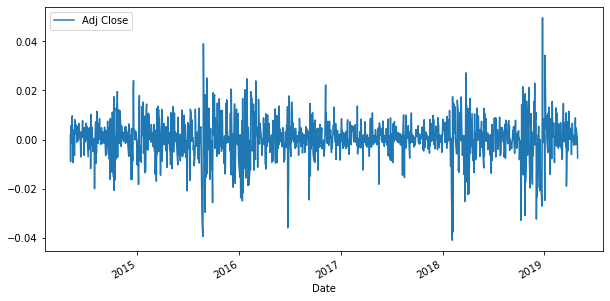

In [12]:
# Plot the daily returns of the S&P 500 over the last 5 years
daily_returns.plot(figsize= (10,5))

In [13]:
# Calculate the cumulative returns using the 'cumprod()' function
cum_ret= (1+daily_returns).cumprod()
cum_ret.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,1.001871
2014-05-06,0.992866
2014-05-07,0.998442
2014-05-08,0.997071


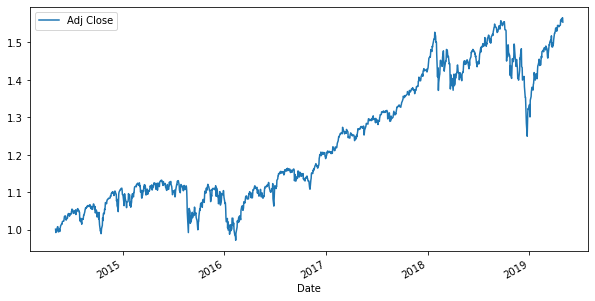

In [14]:
# Plot the daily returns of the S&P 500 over the last 5 years
cum_ret.plot(figsize= (10,5))